# **1. Import Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Import Data**

In [2]:
filePath = 'Data/Super-Store-2021.xlsx'

In [3]:
df = pd.read_excel(filePath)

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Category                9994 non-null   object        
 1   City                    9994 non-null   object        
 2   Country/Region          9994 non-null   object        
 3   Customer ID             9994 non-null   object        
 4   Customer Name           9994 non-null   object        
 5   Order Date              9994 non-null   datetime64[ns]
 6   Order ID                9994 non-null   object        
 7   Postal Code             9983 non-null   float64       
 8   Product ID              9994 non-null   object        
 9   Product Name            9994 non-null   object        
 10  Region                  9994 non-null   object        
 11  Row ID                  9994 non-null   int64         
 12  Segment                 9994 non-null   object  

,Category,City,Country/Region,Customer ID,Customer Name,Order Date,Order ID,Postal Code,Product ID,Product Name,...,Ship Status,State,Sub-Category,Days to Ship Actual,Days to Ship Scheduled,Discount,Profit,Quantity,Sales,Sales Forecast
0,Furniture,Henderson,United States,CG-12520,Claire Gute,2020-11-08,CA-2020-152156,42420.0,FUR-BO-10001798,Bush Somerset Collection Bookcase,...,Shipped On Time,Kentucky,Bookcases,3,3,0.00,42,2,262,392
1,Furniture,Henderson,United States,CG-12520,Claire Gute,2020-11-08,CA-2020-152156,42420.0,FUR-CH-10000454,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",...,Shipped On Time,Kentucky,Chairs,3,3,0.00,220,3,732,1096
2,Office Supplies,Los Angeles,United States,DV-13045,Darrin Van Huff,2020-06-12,CA-2020-138688,90036.0,OFF-LA-10000240,Self-Adhesive Address Labels for Typewriters b...,...,Shipped Late,California,Labels,4,3,0.00,7,2,15,22
3,Furniture,Fort Lauderdale,United States,SO-20335,Sean O'Donnell,2019-10-11,US-2019-108966,33311.0,FUR-TA-10000577,Bretford CR4500 Series Slim Rectangular Table,...,Shipped Late,Florida,Tables,7,6,0.45,-383,5,958,1434
4,Office Supplies,Fort Lauderdale,United States,SO-20335,Sean O'Donnell,2019-10-11,US-2019-108966,33311.0,OFF-ST-10000760,Eldon Fold 'N Roll Cart System,...,Shipped Late,Florida,Storage,7,6,0.20,3,2,22,33


# **3. Practice**

## **3.1. KPI**

In [5]:
#Total revenue = sum of Sales
total_revenue = df['Sales'].sum()
"${:,.0f}".format(total_revenue)

'$2,297,354'

In [8]:
#Total profit = sum of Profit
total_profit = df['Profit'].sum()
"${:,.0f}".format(total_profit)

'$286,347'

In [10]:
#Profit ratio = total profit / total revenue
profit_ratio = total_profit/total_revenue
"{:,.1f}%".format(profit_ratio*100)

'12.5%'

In [13]:
#Count distinct Customer
number_customers = df['Customer ID'].nunique()
"{:,.0f} unique customers".format(number_customers)

'793 unique customers'

In [14]:
#Sale per customer = total revenue / #customer
sale_per_customer = total_revenue / number_customers
"${:,.2f} per customer".format(sale_per_customer)

'$2,897.04 per customer'

In [15]:
# #Quantity = sum of quantity
number_of_quantity = df['Quantity'].sum()
"{:,.0f} items".format(number_of_quantity)

'37,873 items'

## **3.1. Performance by Region**

### 3.1.1. Extracting Data

In [40]:
# df_region = pd.DataFrame({ 'Revenue': df.groupby('Region')['Sales'].sum(),
#                             'Profit': df.groupby('Region')['Profit'].sum(),
#                             'Customer': df.groupby('Region')['Customer ID'].nunique(),
#                             'Quantity': df.groupby('Region')['Quantity'].sum()
#                         })

df_region = df.groupby('Region').agg({'Sales':'sum',
                                      'Profit':'sum',
                                      'Customer ID': 'nunique',
                                      'Quantity': 'sum'})
df_region.reset_index(inplace=True)

#change columns name
#method 1
# df_region.columns = ['Region', 'Revenue', 'Profit', 'No. Customer', 'Quantity']
#method 2
df_region.rename(columns={'Sales':'Revenue', 'Customer ID': 'No. Customer'}, inplace=True)

df_region

,Region,Revenue,Profit,No. Customer,Quantity
0,Central,501256,39719,629,8780
1,East,678834,91521,674,10618
2,South,391750,46721,512,6209
3,West,725514,108386,686,12266


In [42]:
df_region['Sales per Customer'] = df_region['Revenue'] / df_region['No. Customer']
df_region

,Region,Revenue,Profit,No. Customer,Quantity,Sales per Customer
0,Central,501256,39719,629,8780,796.909380
1,East,678834,91521,674,10618,1007.172107
2,South,391750,46721,512,6209,765.136719
3,West,725514,108386,686,12266,1057.600583


### 3.1.2. Visualization

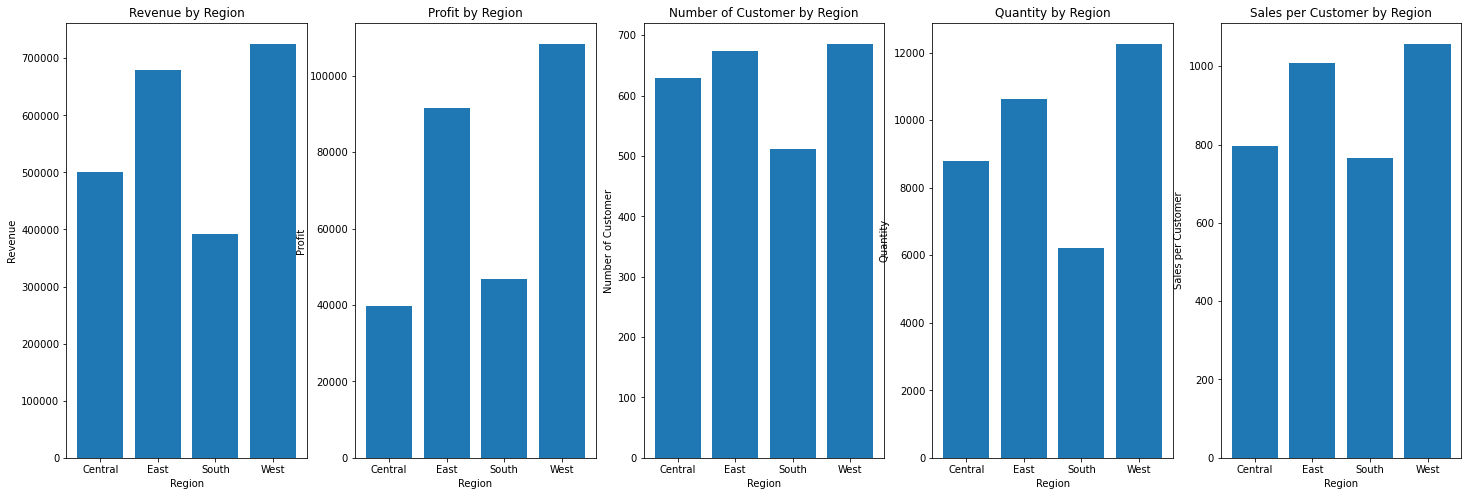

In [43]:
fig, ax = plt.subplots(ncols=5, figsize=(25,8))

ax[0].bar(df_region['Region'], df_region['Revenue'])
ax[0].set(xlabel='Region', ylabel='Revenue', title='Revenue by Region')

ax[1].bar(df_region['Region'], df_region['Profit'])
ax[1].set(xlabel='Region', ylabel='Profit', title='Profit by Region')

ax[2].bar(df_region['Region'], df_region['No. Customer'])
ax[2].set(xlabel='Region', ylabel='Number of Customer', title='Number of Customer by Region')

ax[3].bar(df_region['Region'], df_region['Quantity'])
ax[3].set(xlabel='Region', ylabel='Quantity', title='Quantity by Region')

ax[4].bar(df_region['Region'], df_region['Sales per Customer'])
ax[4].set(xlabel='Region', ylabel='Sales per Customer', title='Sales per Customer by Region')

plt.show()

### **3.2. Pivot Table by Ship Mode**

In [44]:
df.columns

Index(['Category', 'City', 'Country/Region', 'Customer ID', 'Customer Name',
       'Order Date', 'Order ID', 'Postal Code', 'Product ID', 'Product Name',
       'Region', 'Row ID', 'Segment', 'Ship Date', 'Ship Mode', 'Ship Status',
       'State', 'Sub-Category', 'Days to Ship Actual',
       'Days to Ship Scheduled', 'Discount', 'Profit', 'Quantity', 'Sales',
       'Sales Forecast'],
      dtype='object')

In [61]:
df_shipmode = pd.pivot_table(data=df,
                             index=['Order ID', 'Customer ID', 'Order Date', 'Ship Date', 'Ship Mode'],
                             values=['Sales', 'Quantity', 'Discount', 'Profit', 'Days to Ship Scheduled', 'Days to Ship Actual'],
                             aggfunc={
                                'Sales':sum,
                                'Quantity':sum,
                                'Discount':np.mean,
                                'Profit':sum,
                                'Days to Ship Scheduled':np.mean,
                                'Days to Ship Actual':np.mean
                             }
                            ).reset_index()

df_shipmode['Profit Ratio'] = df_shipmode['Profit'] / df_shipmode['Sales']
df_shipmode

,Order ID,Customer ID,Order Date,Ship Date,Ship Mode,Days to Ship Actual,Days to Ship Scheduled,Discount,Profit,Quantity,Sales,Profit Ratio
0,CA-2018-100006,DK-13375,2018-09-07,2018-09-13,Standard Class,6,6,0.000000,110,3,378,0.291005
1,CA-2018-100090,EB-13705,2018-07-08,2018-07-12,Standard Class,4,6,0.200000,-19,9,699,-0.027182
2,CA-2018-100293,NF-18475,2018-03-14,2018-03-18,Standard Class,4,6,0.200000,32,6,91,0.351648
3,CA-2018-100328,JC-15340,2018-01-28,2018-02-03,Standard Class,6,6,0.200000,1,1,4,0.250000
4,CA-2018-100363,JM-15655,2018-04-08,2018-04-15,Standard Class,7,6,0.200000,8,5,21,0.380952
...,...,...,...,...,...,...,...,...,...,...,...,...
5004,US-2021-168802,JO-15145,2021-11-03,2021-11-07,Standard Class,4,6,0.200000,6,4,18,0.333333
5005,US-2021-169320,LH-16900,2021-07-23,2021-07-25,Second Class,2,3,0.000000,16,7,172,0.093023
5006,US-2021-169488,AA-10375,2021-09-07,2021-09-09,First Class,2,1,0.000000,27,7,57,0.473684
5007,US-2021-169502,MG-17650,2021-08-28,2021-09-01,Standard Class,4,6,0.000000,33,8,114,0.289474


In [62]:
df_shipmode['Sales']=df_shipmode['Sales'].apply(lambda x: "${:,.0f}".format(x))
df_shipmode['Sales']

0         $378
1         $699
2          $91
3           $4
4          $21
         ...  
5004       $18
5005      $172
5006       $57
5007      $114
5008    $1,345
Name: Sales, Length: 5009, dtype: object

In [63]:
df_shipmode['Discount']=df_shipmode['Discount'].apply(lambda x: "{:,.0f}%".format(x*100) if x >= 0 else "({:,.0f}%)".format(-x*100))
df_shipmode['Discount']

0        0%
1       20%
2       20%
3       20%
4       20%
       ... 
5004    20%
5005     0%
5006     0%
5007     0%
5008    28%
Name: Discount, Length: 5009, dtype: object

In [64]:
df_shipmode['Profit']=df_shipmode['Profit'].apply(lambda x: "${:,.0f}".format(x) if x >= 0 else "(${:,.0f})".format(-x))
df_shipmode['Profit']

0        $110
1       ($19)
2         $32
3          $1
4          $8
        ...  
5004       $6
5005      $16
5006      $27
5007      $33
5008    ($62)
Name: Profit, Length: 5009, dtype: object